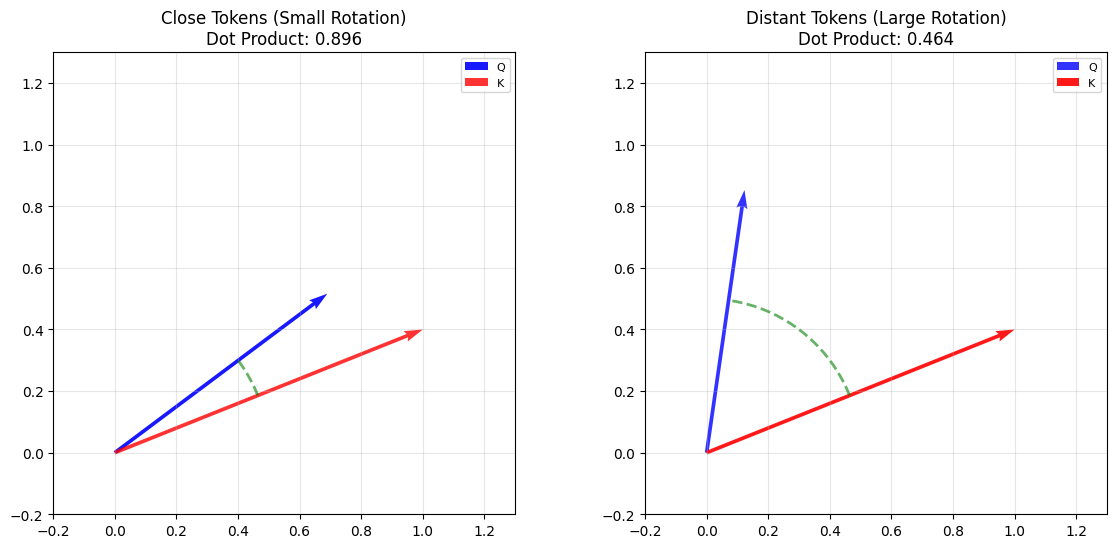

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pathlib

# Set up directory for saving animations
DIR = pathlib.Path(".").resolve()

# Animation parameters
n_frames = 80  # Total frames
pause_frames = 15
# Frames to pause at start and end
animation_frames = n_frames - 2 * pause_frames

# DIFFERENT rotation amounts but SAME duration
max_angle_close = np.pi / 12  # for close tokens (small rotation)
max_angle_distant = np.pi / 3  # for distant tokens (large rotation)

# Original vectors - SAME DIRECTION but different lengths
q_direction = np.array([1.0, 0.4])  # Base direction
q_orig = 0.8 * q_direction  # Q is shorter
k_orig = 1.0 * q_direction  # K is longer (so it's visible "below" Q)


def animate(frame):
    # Clear the figure
    fig.clear()

    # Create subplots
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # Calculate animation progress with pauses
    if frame < pause_frames:
        # Beginning pause
        progress = 0.0
    elif frame > n_frames - pause_frames:
        # End pause
        progress = 1.0
    else:
        # Active animation
        active_frame = frame - pause_frames
        progress = active_frame / (animation_frames - 1)

    # DIFFERENT angles but SAME progress timeline
    current_angle_close = progress * max_angle_close  # Slower rotation, smaller angle
    current_angle_distant = progress * max_angle_distant  # Faster rotation, larger angle

    # Rotation matrices
    cos_close, sin_close = np.cos(current_angle_close), np.sin(current_angle_close)
    rot_close = np.array([[cos_close, -sin_close], [sin_close, cos_close]])

    cos_distant, sin_distant = np.cos(current_angle_distant), np.sin(current_angle_distant)
    rot_distant = np.array([[cos_distant, -sin_distant], [sin_distant, cos_distant]])

    # Apply rotations ONLY to Q (different rotations for each subplot)
    q_close = rot_close @ q_orig  # Small rotation
    q_distant = rot_distant @ q_orig  # Large rotation

    # K remains unchanged in both
    k_fixed = k_orig

    # LEFT subplot: Close tokens (small rotation)
    ax1.quiver(
        0,
        0,
        q_close[0],
        q_close[1],
        angles="xy",
        scale_units="xy",
        scale=1,
        color="blue",
        width=0.008,
        alpha=0.9,
        label="Q",
    )
    ax1.quiver(
        0,
        0,
        k_fixed[0],
        k_fixed[1],
        angles="xy",
        scale_units="xy",
        scale=1,
        color="red",
        width=0.008,
        alpha=0.8,
        label="K",
    )

    # RIGHT subplot: Distant tokens (large rotation)
    ax2.quiver(
        0,
        0,
        q_distant[0],
        q_distant[1],
        angles="xy",
        scale_units="xy",
        scale=1,
        color="blue",
        width=0.008,
        alpha=0.8,
        label="Q",
    )
    ax2.quiver(
        0,
        0,
        k_fixed[0],
        k_fixed[1],
        angles="xy",
        scale_units="xy",
        scale=1,
        color="red",
        width=0.008,
        alpha=0.9,
        label="K",
    )

    # Calculate dot products
    dot_close = np.dot(q_close, k_fixed)
    dot_distant = np.dot(q_distant, k_fixed)

    # Configure axes
    for ax in [ax1, ax2]:
        ax.set_xlim(-0.2, 1.3)
        ax.set_ylim(-0.2, 1.3)
        ax.set_aspect("equal")
        ax.grid(True, alpha=0.3)
        ax.legend(loc="upper right", fontsize=8)

    # Titles with current values
    ax1.set_title(f"Close Tokens (Small Rotation)\nDot Product: {dot_close:.3f}")
    ax2.set_title(f"Distant Tokens (Large Rotation)\nDot Product: {dot_distant:.3f}")

    # Add rotation arcs to show Q's path
    if current_angle_close > 0:
        arc_angles_close = np.linspace(
            np.arctan2(q_orig[1], q_orig[0]), np.arctan2(q_close[1], q_close[0]), 20
        )
        arc_radius = 0.5
        arc_x = arc_radius * np.cos(arc_angles_close)
        arc_y = arc_radius * np.sin(arc_angles_close)
        ax1.plot(arc_x, arc_y, "g--", linewidth=2, alpha=0.6)

    if current_angle_distant > 0:
        arc_angles_distant = np.linspace(
            np.arctan2(q_orig[1], q_orig[0]), np.arctan2(q_distant[1], q_distant[0]), 20
        )
        arc_radius = 0.5
        arc_x = arc_radius * np.cos(arc_angles_distant)
        arc_y = arc_radius * np.sin(arc_angles_distant)
        ax2.plot(arc_x, arc_y, "g--", linewidth=2, alpha=0.6)


# Create figure
fig = plt.figure(figsize=(14, 6))

# Create and save animation
animation = FuncAnimation(fig, animate, frames=n_frames, interval=120, repeat=True)
animation.save(DIR / "rope_basic_rotation.gif", writer="pillow", fps=10)

# plt.close()
plt.show()

In [6]:
import numpy as np
import plotly.graph_objects as go

# Define the vector around which the plane will rotate
define_vector = np.array([1, 1, 1])

# Normalize the vector - this will be one basis vector of our plane
vec_norm = define_vector / np.linalg.norm(define_vector)

# Find an orthogonal vector to create the plane
arbitrary_vec = np.array([1, 0, 0])
if np.allclose(arbitrary_vec, vec_norm):
    arbitrary_vec = np.array([0, 1, 0])

# Create the second basis vector orthogonal to vec_norm
v2 = arbitrary_vec - np.dot(arbitrary_vec, vec_norm) * vec_norm
v2 /= np.linalg.norm(v2)

# Now the plane is spanned by vec_norm and v2, so vec_norm lies in the plane
square_size = 1
# Shift the square so it starts at the origin along the vector direction
square_vertices = np.array(
    [
        [0, -square_size],
        [2 * square_size, -square_size],
        [2 * square_size, square_size],
        [0, square_size],
    ]
)

# Create the plane coordinates in 3D using vec_norm and v2 as basis vectors
plane_vertices = np.outer(square_vertices[:, 0], vec_norm) + np.outer(square_vertices[:, 1], v2)

# For the outline
square_coords = np.array(
    [
        [0, -square_size],
        [2 * square_size, -square_size],
        [2 * square_size, square_size],
        [0, square_size],
        [0, -square_size],  # Close the square
    ]
)
plane_coords = np.outer(square_coords[:, 0], vec_norm) + np.outer(square_coords[:, 1], v2)


# Rotation matrix around vector axis
def rotation_matrix(axis, theta):
    axis = axis / np.linalg.norm(axis)
    a = np.cos(theta / 2.0)
    b, c, d = -axis * np.sin(theta / 2.0)
    return np.array(
        [
            [a * a + b * b - c * c - d * d, 2 * (b * c - a * d), 2 * (b * d + a * c)],
            [2 * (b * c + a * d), a * a + c * c - b * b - d * d, 2 * (c * d - a * b)],
            [2 * (b * d - a * c), 2 * (c * d + a * b), a * a + d * d - b * b - c * c],
        ]
    )


# Prepare frames for animation
num_frames = 60
angles = np.linspace(0, 2 * np.pi, num_frames)
frames_outline = []
frames_surface = []

for angle in angles:
    rot_mat = rotation_matrix(vec_norm, angle)
    rotated_plane_outline = plane_coords @ rot_mat.T
    rotated_plane_surface = plane_vertices @ rot_mat.T
    frames_outline.append(rotated_plane_outline)
    frames_surface.append(rotated_plane_surface)

# Origin and vector line for visualization
origin = np.array([0, 0, 0])
vector_end = vec_norm * 2

# Arrow head properties
arrow_head_size = 0.35
arrow_position = vector_end

# Create plotly figure
fig = go.Figure(
    data=[
        # Vector line
        go.Scatter3d(
            x=[origin[0], vector_end[0]],
            y=[origin[1], vector_end[1]],
            z=[origin[2], vector_end[2]],
            mode="lines",
            line=dict(color="red", width=5),
            name="Vector",
        ),
        # Arrow head
        go.Cone(
            x=[arrow_position[0]],
            y=[arrow_position[1]],
            z=[arrow_position[2]],
            u=[vec_norm[0]],
            v=[vec_norm[1]],
            w=[vec_norm[2]],
            sizemode="absolute",
            sizeref=arrow_head_size,
            showscale=False,
            colorscale=[[0, "red"], [1, "red"]],
            name="Vector Head",
        ),
        # Plane surface (filled)
        go.Mesh3d(
            x=frames_surface[0][:, 0],
            y=frames_surface[0][:, 1],
            z=frames_surface[0][:, 2],
            i=[0, 0],
            j=[1, 2],
            k=[2, 3],
            color="blue",
            opacity=0.3,
            name="Plane Surface",
        ),
        # Plane outline
        go.Scatter3d(
            x=frames_outline[0][:, 0],
            y=frames_outline[0][:, 1],
            z=frames_outline[0][:, 2],
            mode="lines",
            line=dict(color="blue", width=3),
            name="Plane Outline",
        ),
    ],
    layout=go.Layout(
        title="There are infinite possible Rotating Planes",
        scene=dict(
            xaxis=dict(range=[-2, 2]),
            yaxis=dict(range=[-2, 2]),
            zaxis=dict(range=[-2, 2]),
            aspectmode="cube",
            camera=dict(
                eye=dict(x=-1, y=2, z=0.5),  # Camera position
                center=dict(x=0, y=0, z=0),  # What point the camera looks at
                up=dict(x=0, y=0, z=1),  # Camera orientation
            ),
        ),
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(
                        label="Play",
                        method="animate",
                        args=[
                            None,
                            {"frame": {"duration": 50, "redraw": True}, "fromcurrent": True},
                        ],
                    ),
                    dict(
                        label="Pause",
                        method="animate",
                        args=[
                            [None],
                            {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"},
                        ],
                    ),
                ],
            )
        ],
    ),
    frames=[
        go.Frame(
            data=[
                go.Scatter3d(
                    x=[origin[0], vector_end[0]],
                    y=[origin[1], vector_end[1]],
                    z=[origin[2], vector_end[2]],
                    mode="lines",
                    line=dict(color="red", width=5),
                    name="Vector",
                ),
                go.Cone(
                    x=[arrow_position[0]],
                    y=[arrow_position[1]],
                    z=[arrow_position[2]],
                    u=[vec_norm[0]],
                    v=[vec_norm[1]],
                    w=[vec_norm[2]],
                    sizemode="absolute",
                    sizeref=arrow_head_size,
                    showscale=False,
                    colorscale=[[0, "red"], [1, "red"]],
                    name="Vector Head",
                ),
                go.Mesh3d(
                    x=frames_surface[k][:, 0],
                    y=frames_surface[k][:, 1],
                    z=frames_surface[k][:, 2],
                    i=[0, 0],
                    j=[1, 2],
                    k=[2, 3],
                    color="blue",
                    opacity=0.3,
                    name="Plane Surface",
                ),
                go.Scatter3d(
                    x=frames_outline[k][:, 0],
                    y=frames_outline[k][:, 1],
                    z=frames_outline[k][:, 2],
                    mode="lines",
                    line=dict(color="blue", width=3),
                    name="Plane Outline",
                ),
            ]
        )
        for k in range(num_frames)
    ],
)

fig.write_html("rope_3d_interactive.html")
fig.show()

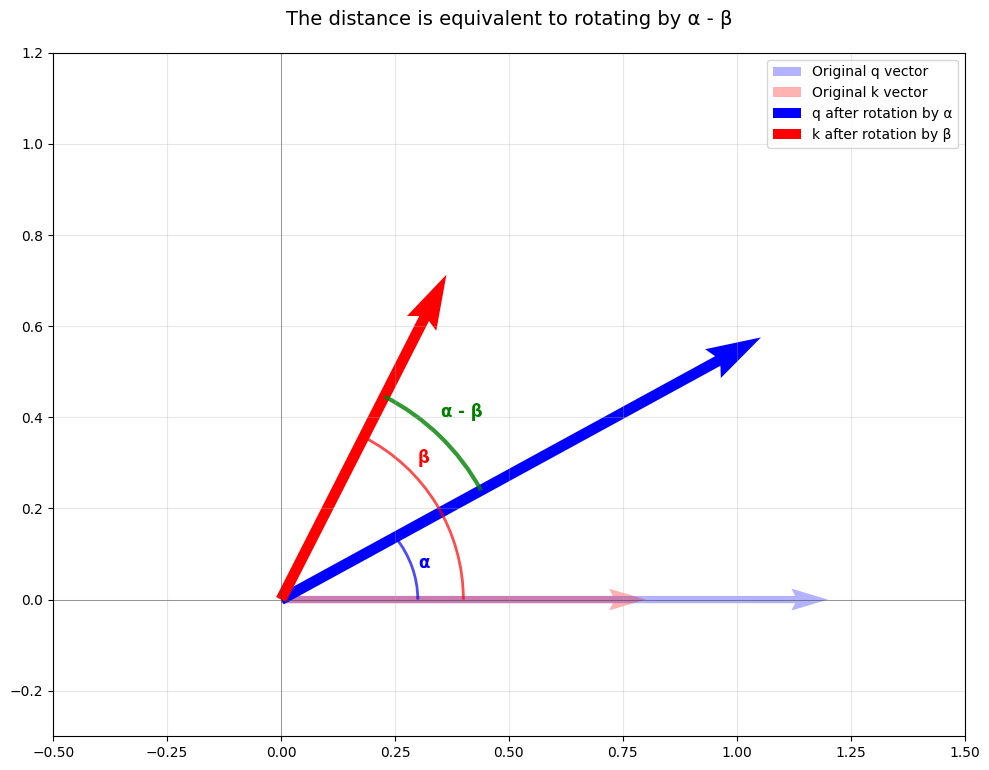

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Define two vectors initially on x-axis with different lengths
v1 = np.array([1.2, 0])  # Blue vector (longer)
v2 = np.array([0.8, 0])  # Red vector (shorter)

# Rotation angles for positions m=2 and n=5 (example)
theta_m = 0.5  # alpha - rotation for token at position m
theta_n = 1.1  # beta - rotation for token at position n


# Rotation matrix function
def rotate_vector(v, theta):
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return R @ v


# Rotated vectors
v1_rot = rotate_vector(v1, theta_m)
v2_rot = rotate_vector(v2, theta_n)

# Plot original vectors (faded)
ax.quiver(
    0,
    0,
    v1[0],
    v1[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="blue",
    width=0.008,
    label="Original q vector",
    alpha=0.3,
)
ax.quiver(
    0,
    0,
    v2[0],
    v2[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="red",
    width=0.008,
    label="Original k vector",
    alpha=0.3,
)

# Plot rotated vectors
ax.quiver(
    0,
    0,
    v1_rot[0],
    v1_rot[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="blue",
    width=0.012,
    label="q after rotation by α",
)
ax.quiver(
    0,
    0,
    v2_rot[0],
    v2_rot[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="red",
    width=0.012,
    label="k after rotation by β",
)

# Draw angle arcs
from matplotlib.patches import Arc

# Alpha arc (blue)
arc_alpha = Arc(
    (0, 0),
    0.6,
    0.5,
    angle=0,
    theta1=0,
    theta2=np.degrees(theta_m),
    color="blue",
    linewidth=2,
    alpha=0.7,
)
ax.add_patch(arc_alpha)
ax.text(0.3, 0.07, f"α", fontsize=12, color="blue", fontweight="bold")

# Beta arc (red)
arc_beta = Arc(
    (0, 0),
    0.8,
    0.8,
    angle=0,
    theta1=0,
    theta2=np.degrees(theta_n),
    color="red",
    linewidth=2,
    alpha=0.7,
)
ax.add_patch(arc_beta)
ax.text(0.3, 0.3, f"β", fontsize=12, color="red", fontweight="bold")

# Angle between rotated vectors (alpha - beta)
angle_between = np.arccos(
    np.dot(v1_rot, v2_rot) / (np.linalg.norm(v1_rot) * np.linalg.norm(v2_rot))
)
mid_angle = (theta_m + theta_n) / 2

# Draw arc between the two rotated vectors
start_angle = min(theta_m, theta_n)
end_angle = max(theta_m, theta_n)
arc_diff = Arc(
    (0, 0),
    1.0,
    1.0,
    angle=0,
    theta1=np.degrees(start_angle),
    theta2=np.degrees(end_angle),
    color="green",
    linewidth=3,
    alpha=0.8,
)
ax.add_patch(arc_diff)
ax.text(
    0.35,
    0.4,
    f"α - β",
    fontsize=12,
    color="green",
    fontweight="bold",
)

# Set plot properties
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.3, 1.2)
ax.grid(True, alpha=0.3)
ax.set_aspect("equal")
ax.legend(loc="upper right")
ax.set_title(
    "The distance is equivalent to rotating by α - β",
    fontsize=14,
    pad=20,
)

# Add coordinate axes
ax.axhline(y=0, color="k", linewidth=0.5, alpha=0.5)
ax.axvline(x=0, color="k", linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.savefig("rope_rotation_visualization.png", dpi=300, bbox_inches="tight")
plt.show()

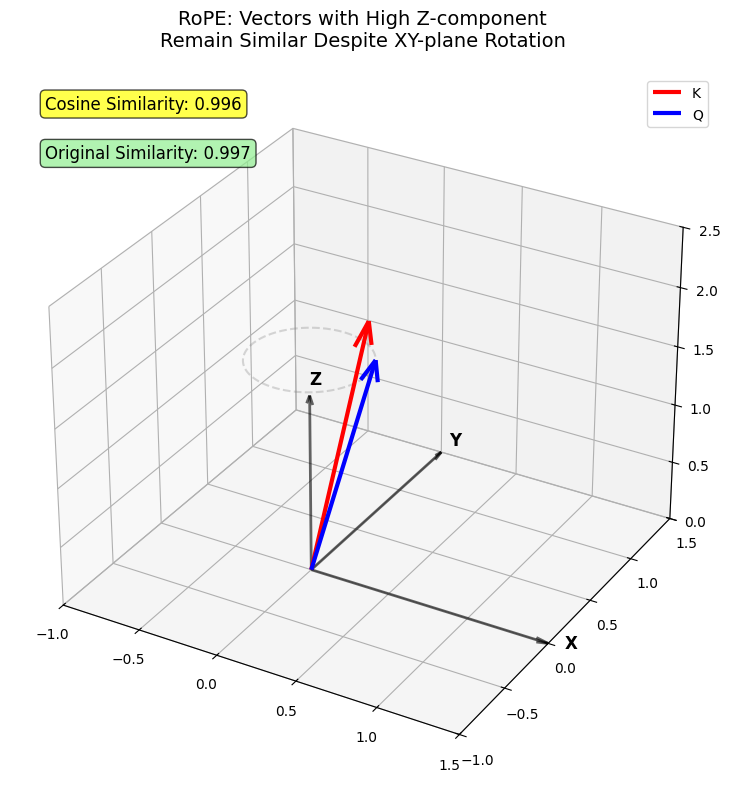

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Define two vectors with low x,y but high z values
v1 = np.array([0.2, 0.3, 2.0])  # Vector 1 (stays fixed)
v2 = np.array([0.3, 0.2, 1.8])  # Vector 2 (will be rotated)

# Store original dot product for comparison
original_dot = np.dot(v1, v2)
original_magnitude = np.linalg.norm(v1) * np.linalg.norm(v2)
original_similarity = original_dot / original_magnitude


def rotate_z(vector, angle):
    """Rotate vector around z-axis by given angle"""
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    rotation_matrix = np.array([[cos_a, -sin_a, 0], [sin_a, cos_a, 0], [0, 0, 1]])
    return rotation_matrix @ vector


def animate(frame):
    ax.clear()

    # Calculate rotation angle for current frame
    angle = frame * 0.1  # Slow rotation

    # Rotate v2 around z-axis
    v2_rotated = rotate_z(v2, angle)

    # Calculate current similarity
    current_dot = np.dot(v1, v2_rotated)
    current_magnitude = np.linalg.norm(v1) * np.linalg.norm(v2_rotated)
    current_similarity = current_dot / current_magnitude

    # Draw coordinate axes explicitly
    axis_length = 1.5
    ax.quiver(
        0,
        0,
        0,
        axis_length,
        0,
        0,
        color="black",
        arrow_length_ratio=0.05,
        linewidth=2,
        alpha=0.6,
    )
    ax.quiver(
        0,
        0,
        0,
        0,
        axis_length,
        0,
        color="black",
        arrow_length_ratio=0.05,
        linewidth=2,
        alpha=0.6,
    )
    ax.quiver(
        0,
        0,
        0,
        0,
        0,
        axis_length,
        color="black",
        arrow_length_ratio=0.05,
        linewidth=2,
        alpha=0.6,
    )

    # Add axis labels at the ends
    ax.text(axis_length + 0.1, 0, 0, "X", fontsize=12, fontweight="bold")
    ax.text(0, axis_length + 0.1, 0, "Y", fontsize=12, fontweight="bold")
    ax.text(0, 0, axis_length + 0.1, "Z", fontsize=12, fontweight="bold")

    # Plot the vectors
    ax.quiver(
        0,
        0,
        0,
        v1[0],
        v1[1],
        v1[2],
        color="red",
        arrow_length_ratio=0.1,
        linewidth=3,
        label=f"K",
    )

    ax.quiver(
        0,
        0,
        0,
        v2_rotated[0],
        v2_rotated[1],
        v2_rotated[2],
        color="blue",
        arrow_length_ratio=0.1,
        linewidth=3,
        label=f"Q",
    )

    # Draw the xy-plane rotation circle for reference
    theta_circle = np.linspace(0, 2 * np.pi, 100)
    circle_radius = np.linalg.norm([v2[0], v2[1]])
    x_circle = circle_radius * np.cos(theta_circle)
    y_circle = circle_radius * np.sin(theta_circle)
    z_circle = np.full_like(x_circle, v2[2])
    ax.plot(x_circle, y_circle, z_circle, "gray", alpha=0.3, linestyle="--")

    # Add similarity text
    ax.text2D(
        0.05,
        0.95,
        f"Cosine Similarity: {current_similarity:.3f}",
        transform=ax.transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
    )

    ax.text2D(
        0.05,
        0.88,
        f"Original Similarity: {original_similarity:.3f}",
        transform=ax.transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
    )

    # Set axis properties
    ax.set_xlim(-1, 1.5)
    ax.set_ylim(-1, 1.5)
    ax.set_zlim(0, 2.5)
    ax.legend()
    ax.set_title(
        "RoPE: Vectors with High Z-component\nRemain Similar Despite XY-plane Rotation",
        fontsize=14,
        pad=20,
    )

    # Add grid
    ax.grid(True, alpha=0.3)


# Create animation
anim = FuncAnimation(fig, animate, frames=63, interval=100, repeat=True)

# Save as GIF
anim.save("rope_high_xy_rotation_1.gif", writer="pillow", fps=10)

plt.tight_layout()
plt.show()

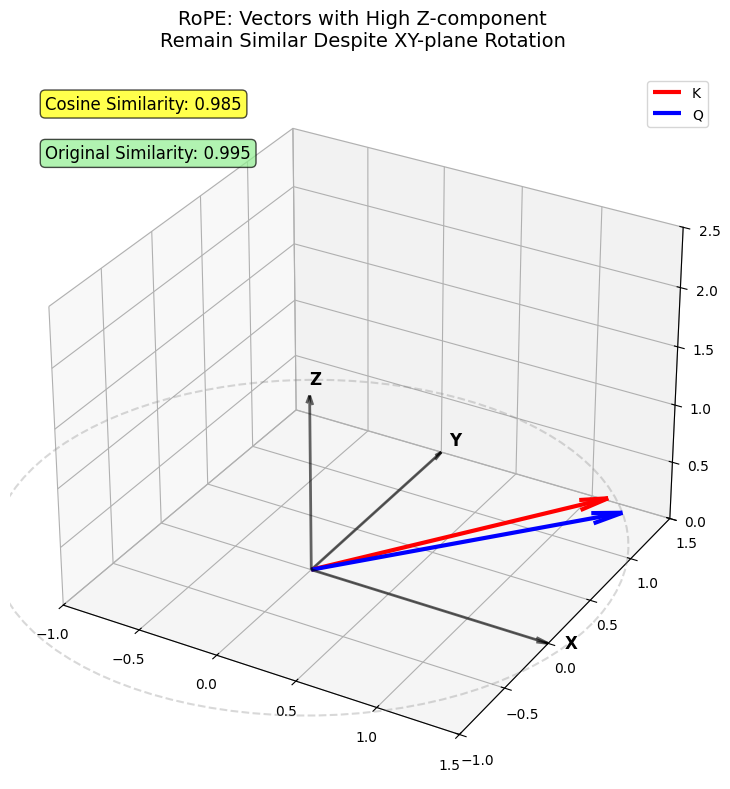

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Define two vectors with low x,y but high z values
v1 = np.array([1.2, 1.3, 0.2])  # Vector 1 (stays fixed)
v2 = np.array([1.3, 1.2, 0.3])  # Vector 2 (will be rotated)

# Store original dot product for comparison
original_dot = np.dot(v1, v2)
original_magnitude = np.linalg.norm(v1) * np.linalg.norm(v2)
original_similarity = original_dot / original_magnitude


def rotate_z(vector, angle):
    """Rotate vector around z-axis by given angle"""
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    rotation_matrix = np.array([[cos_a, -sin_a, 0], [sin_a, cos_a, 0], [0, 0, 1]])
    return rotation_matrix @ vector


def animate(frame):
    ax.clear()

    # Calculate rotation angle for current frame
    angle = frame * 0.1  # Slow rotation

    # Rotate v2 around z-axis
    v2_rotated = rotate_z(v2, angle)

    # Calculate current similarity
    current_dot = np.dot(v1, v2_rotated)
    current_magnitude = np.linalg.norm(v1) * np.linalg.norm(v2_rotated)
    current_similarity = current_dot / current_magnitude

    # Draw coordinate axes explicitly
    axis_length = 1.5
    ax.quiver(
        0,
        0,
        0,
        axis_length,
        0,
        0,
        color="black",
        arrow_length_ratio=0.05,
        linewidth=2,
        alpha=0.6,
    )
    ax.quiver(
        0,
        0,
        0,
        0,
        axis_length,
        0,
        color="black",
        arrow_length_ratio=0.05,
        linewidth=2,
        alpha=0.6,
    )
    ax.quiver(
        0,
        0,
        0,
        0,
        0,
        axis_length,
        color="black",
        arrow_length_ratio=0.05,
        linewidth=2,
        alpha=0.6,
    )

    # Add axis labels at the ends
    ax.text(axis_length + 0.1, 0, 0, "X", fontsize=12, fontweight="bold")
    ax.text(0, axis_length + 0.1, 0, "Y", fontsize=12, fontweight="bold")
    ax.text(0, 0, axis_length + 0.1, "Z", fontsize=12, fontweight="bold")

    # Plot the vectors
    ax.quiver(
        0,
        0,
        0,
        v1[0],
        v1[1],
        v1[2],
        color="red",
        arrow_length_ratio=0.1,
        linewidth=3,
        label=f"K",
    )

    ax.quiver(
        0,
        0,
        0,
        v2_rotated[0],
        v2_rotated[1],
        v2_rotated[2],
        color="blue",
        arrow_length_ratio=0.1,
        linewidth=3,
        label=f"Q",
    )

    # Draw the xy-plane rotation circle for reference
    theta_circle = np.linspace(0, 2 * np.pi, 100)
    circle_radius = np.linalg.norm([v2[0], v2[1]])
    x_circle = circle_radius * np.cos(theta_circle)
    y_circle = circle_radius * np.sin(theta_circle)
    z_circle = np.full_like(x_circle, v2[2])
    ax.plot(x_circle, y_circle, z_circle, "gray", alpha=0.3, linestyle="--")

    # Add similarity text
    ax.text2D(
        0.05,
        0.95,
        f"Cosine Similarity: {current_similarity:.3f}",
        transform=ax.transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
    )

    ax.text2D(
        0.05,
        0.88,
        f"Original Similarity: {original_similarity:.3f}",
        transform=ax.transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
    )

    # Set axis properties
    ax.set_xlim(-1, 1.5)
    ax.set_ylim(-1, 1.5)
    ax.set_zlim(0, 2.5)
    ax.legend()
    ax.set_title(
        "RoPE: Vectors with High Z-component\nRemain Similar Despite XY-plane Rotation",
        fontsize=14,
        pad=20,
    )

    # Add grid
    ax.grid(True, alpha=0.3)


# Create animation
anim = FuncAnimation(fig, animate, frames=63, interval=100, repeat=True)

# Save as GIF
anim.save("rope_high_xy_rotation_2.gif", writer="pillow", fps=10)

plt.tight_layout()
plt.show()